In [1]:
using Distributions
using QuadGK
using StatsPlots
default(fmt=:png)

In [2]:
Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [3]:
2 + 3Normal()

Normal{Float64}(μ=2.0, σ=3.0)

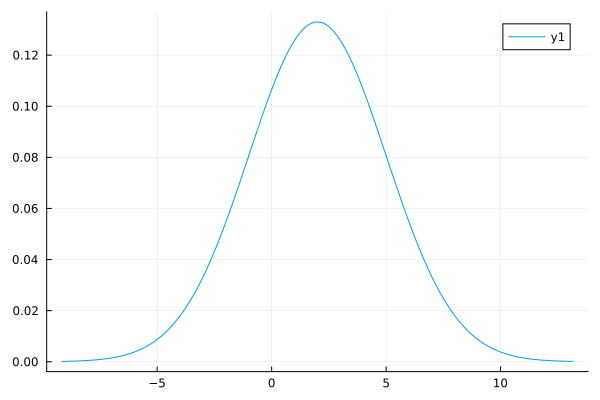

In [4]:
plot(2 + 3Normal())

In [5]:
Gamma(2, 3)

Gamma{Float64}(α=2.0, θ=3.0)

In [6]:
100 + 5Gamma(2, 3)

LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: 100.0
σ: 5.0
ρ: Gamma{Float64}(α=2.0, θ=3.0)
)


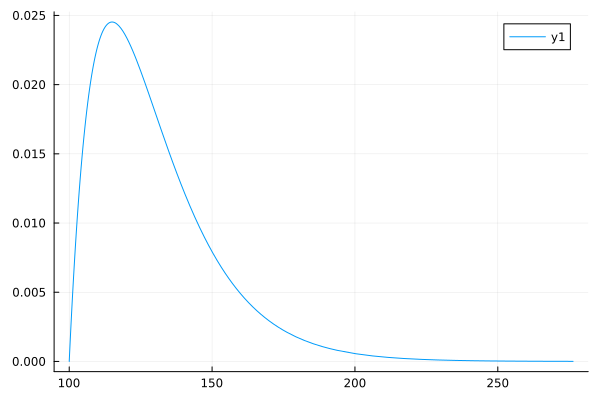

In [7]:
plot(100 + 5Gamma(2, 3))

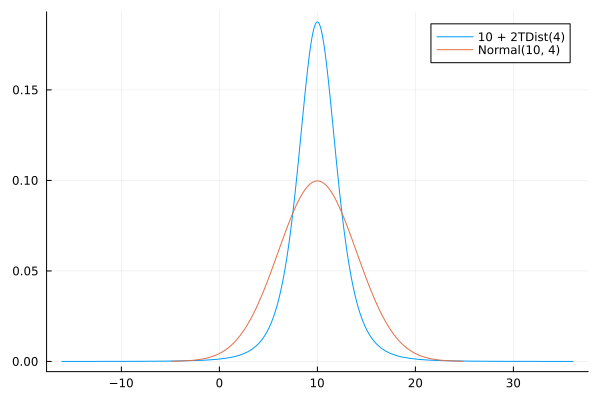

In [8]:
plot(10 + 2TDist(4); label="10 + 2TDist(4)")
plot!(Normal(10, 4); label="Normal(10, 4)")

In [9]:
prod_poissons = product_distribution([Poisson(7), Poisson(3)])

Product{Discrete, Poisson{Float64}, Vector{Poisson{Float64}}}(v=Poisson{Float64}[Poisson{Float64}(λ=7.0), Poisson{Float64}(λ=3.0)])

In [10]:
X = rand(prod_poissons, 10^6)

2×1000000 Matrix{Int64}:
 7  8  9  5  6  12  9  9  7  5  8  11  …  7  8  7  7  8  13  8  6  8  12  7
 2  2  2  2  6   3  2  1  3  3  5   7     2  2  1  2  5   3  1  2  2   1  5

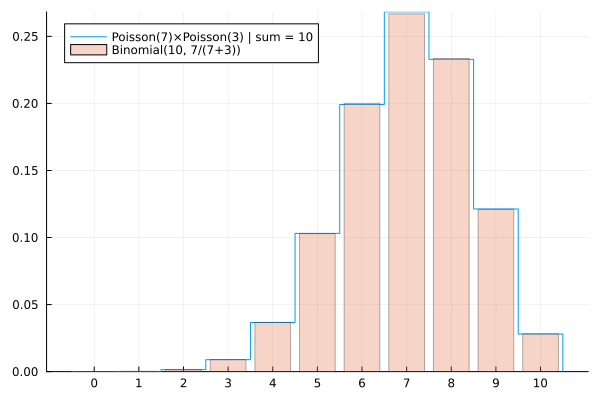

In [11]:
Y = [v[1] for v in eachcol(X) if sum(v) == 10]
stephist(Y; norm=true, bin=-0.5:10.5, xtick=0:10,
    label="Poisson(7)×Poisson(3) | sum = 10")
bar!(Binomial(10, 7/(7+3)); alpha=0.3, label="Binomial(10, 7/(7+3))")

In [12]:
mixnormal = MixtureModel([Normal(), Normal(20)], [0.95, 0.05])

MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)


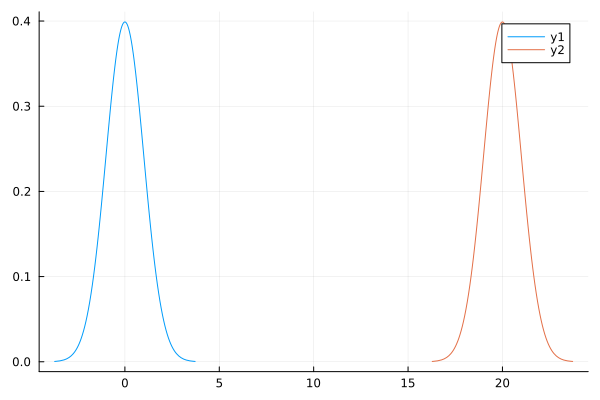

In [13]:
plot(mixnormal) # maybe bug

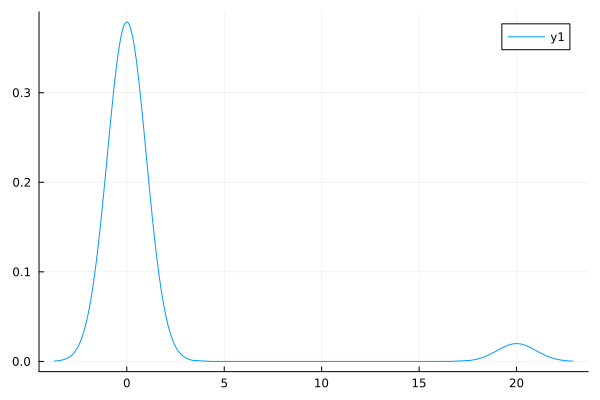

In [14]:
plot(1mixnormal)

In [15]:
1mixnormal

LocationScale{Float64, Continuous, MixtureModel{Univariate, Continuous, Normal{Float64}, Categorical{Float64, Vector{Float64}}}}(
μ: 0.0
σ: 1.0
ρ: MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=20.0, σ=1.0)

)


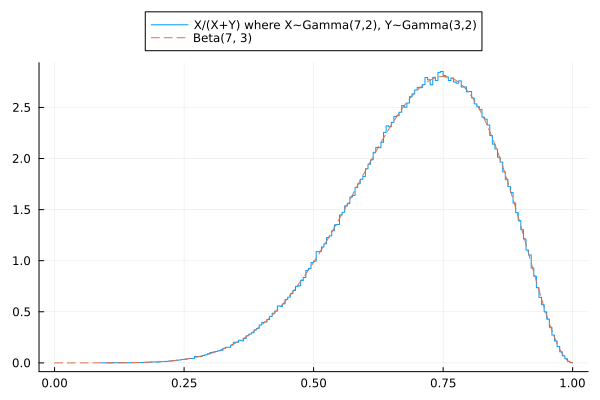

In [16]:
L = 10^6
X = rand(Gamma(7, 2), L)
Y = rand(Gamma(3, 2), L)
Z = @. X / (X + Y)

stephist(Z; norm=true, label="X/(X+Y) where X~Gamma(7,2), Y~Gamma(3,2)")
plot!(Beta(7, 3); label="Beta(7, 3)", ls=:dash)
plot!(legend=:outertop)

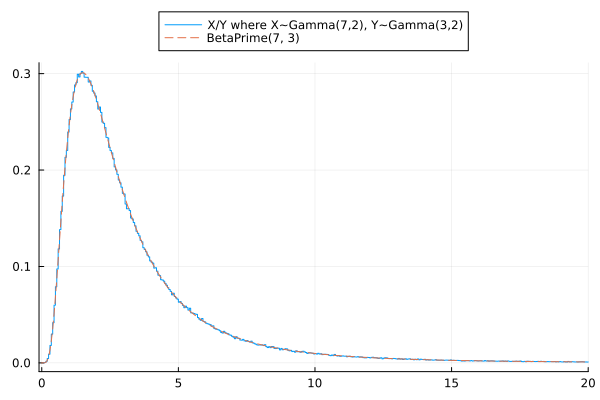

In [17]:
L = 10^6
X = rand(Gamma(7, 2), L)
Y = rand(Gamma(3, 2), L)
Z = @. X / Y

stephist(Z; norm=true, label="X/Y where X~Gamma(7,2), Y~Gamma(3,2)")
plot!(BetaPrime(7, 3); label="BetaPrime(7, 3)", ls=:dash)
plot!(legend=:outertop, xlim=(-0.1, 20))

var(Z) = 4.998356851315853
var(Binomial(20, 0.5)) = 5.0


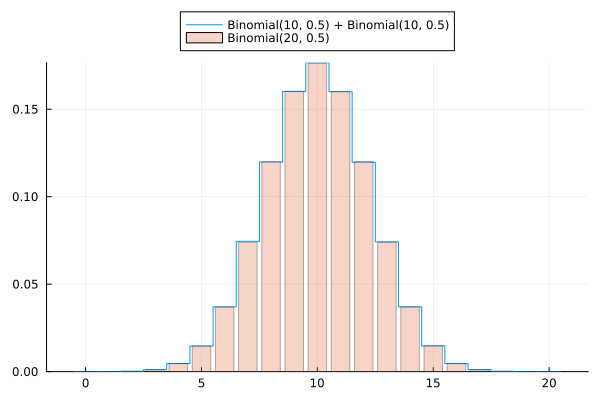

In [18]:
L = 10^6
X = rand(Binomial(10, 0.5), L)
Y = rand(Binomial(10, 0.5), L)
Z = X + Y

@show var(Z)
@show var(Binomial(20, 0.5))

stephist(Z; norm=true, bin=-0.5:20.5, label="Binomial(10, 0.5) + Binomial(10, 0.5)")
bar!(Binomial(20, 0.5); alpha=0.3, label="Binomial(20, 0.5)")
plot!(legend=:outertop)

var(Z) = 3.1999844602234586
var(Binomial(20, 0.5)) = 5.0
var(Binomial(10, 0.2)) + var(Binomial(10, 0.8)) = 3.1999999999999997


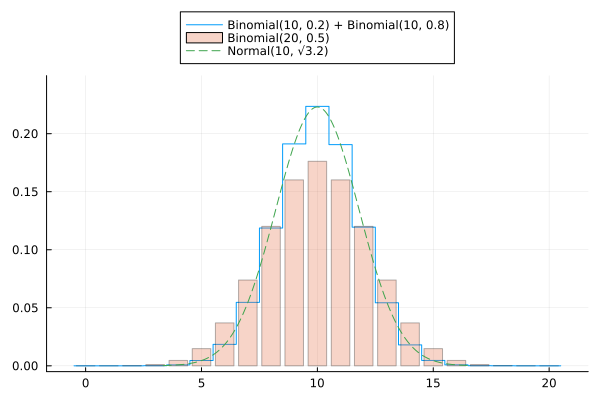

In [19]:
L = 10^6
X = rand(Binomial(10, 0.2), L)
Y = rand(Binomial(10, 0.8), L)
Z = X + Y

@show var(Z)
@show var(Binomial(20, 0.5))
@show var(Binomial(10, 0.2)) + var(Binomial(10, 0.8))

stephist(Z; norm=true, bin=-0.5:20.5, label="Binomial(10, 0.2) + Binomial(10, 0.8)")
bar!(Binomial(20, 0.5); alpha=0.3, label="Binomial(20, 0.5)")
plot!(Normal(10, √3.2); label="Normal(10, √3.2)", ls=:dash)
plot!(legend=:outertop, ylim=(-0.005, 0.25))